In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [72]:
zero  = pd.read_csv("0.csv", header=None)
one   = pd.read_csv("1.csv", header=None)
two   = pd.read_csv("2.csv", header=None)
three = pd.read_csv("3.csv", header=None)

In [73]:
dataset = pd.concat([zero, one, two, three], axis=0)
dataset = dataset.sample(frac = 1)
dataset.index = list(range(dataset.shape[0]))

In [74]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-2.0,-1.0,-1.0,1.0,24.0,-3.0,-3.0,-1.0,-9.0,-5.0,...,0.0,-7.0,-8.0,-10.0,-11.0,-1.0,-50.0,-19.0,-12.0,3
1,25.0,2.0,7.0,15.0,1.0,-4.0,-44.0,12.0,-14.0,10.0,...,3.0,-11.0,2.0,6.0,7.0,-5.0,2.0,69.0,1.0,0
2,5.0,-6.0,1.0,4.0,8.0,76.0,12.0,7.0,-11.0,0.0,...,-5.0,7.0,0.0,2.0,3.0,1.0,47.0,20.0,27.0,3
3,-6.0,-3.0,-3.0,0.0,18.0,21.0,-2.0,-6.0,24.0,-2.0,...,9.0,-5.0,-2.0,1.0,3.0,3.0,1.0,-3.0,-5.0,3
4,5.0,30.0,9.0,5.0,18.0,8.0,7.0,5.0,6.0,1.0,...,-4.0,11.0,10.0,2.0,5.0,13.0,3.0,8.0,18.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11673,-12.0,-4.0,-2.0,-2.0,-15.0,0.0,-1.0,7.0,-11.0,-1.0,...,26.0,-2.0,0.0,1.0,1.0,11.0,17.0,1.0,-1.0,1
11674,-4.0,5.0,1.0,6.0,-6.0,21.0,10.0,11.0,-15.0,4.0,...,5.0,-6.0,-3.0,-7.0,-6.0,8.0,-33.0,-14.0,-3.0,3
11675,2.0,-29.0,1.0,1.0,20.0,5.0,0.0,2.0,-12.0,7.0,...,-14.0,4.0,-5.0,3.0,3.0,15.0,18.0,7.0,6.0,2
11676,0.0,5.0,4.0,10.0,9.0,7.0,12.0,5.0,-5.0,-7.0,...,18.0,-32.0,2.0,5.0,2.0,-16.0,-31.0,-61.0,-45.0,0


In [75]:
train, test = train_test_split(dataset, test_size=0.2)

In [76]:
train_x = train.iloc[:, :-1].copy(deep=True)
train_y = train.iloc[:, -1].copy(deep=True)
test_x = test.iloc[:, :-1].copy(deep=True)
test_y = test.iloc[:, -1].copy(deep=True)

Best K: 11
K Nearest Neighbors Accuracy: 68 %


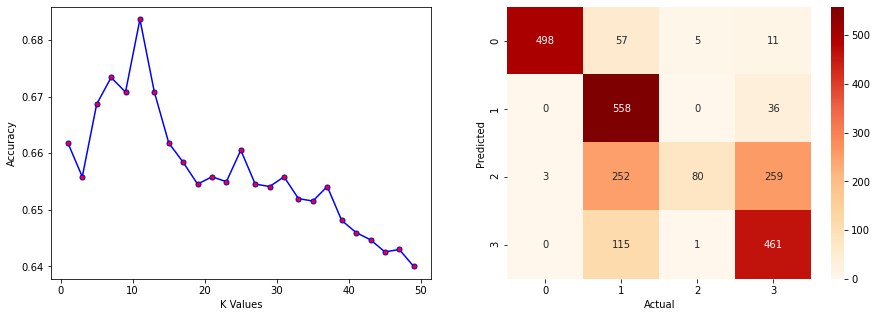

In [125]:
from sklearn.neighbors import KNeighborsClassifier

k = 1
best_acc = 0
acc_list = []
knn_con_mat = None

for i in range(1, 50, 2):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x, train_y)
    knn_pred = knn.predict(test_x)
    new_acc = accuracy_score(test_y, knn_pred)
    acc_list.append(new_acc)
    
    if new_acc > best_acc:
        best_acc = new_acc
        k = i
        knn_con_mat = confusion_matrix(test_y, knn_pred)

f, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(range(1,50,2),acc_list,color = 'blue', marker='o',markerfacecolor='red', markersize=5)
ax[0].set_xlabel("K Values")
ax[0].set_ylabel("Accuracy")
ax[1] = sns.heatmap(knn_con_mat, annot=True, fmt="d", cbar=True, cmap=plt.cm.OrRd)
ax[1].set_xlabel("Actual")
ax[1].set_ylabel("Predicted")

print("Best K:", k)
print("K Nearest Neighbors Accuracy:", int(best_acc * 100), "%")

Decision Tree Accuracy: 77 %


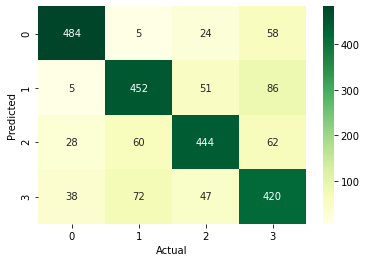

In [130]:
from sklearn import tree
dec_tree = tree.DecisionTreeClassifier()
dec_tree.fit(train_x, train_y)
dec_tree_pred = dec_tree.predict(test_x)

dec_tree_con_mat = confusion_matrix(test_y, dec_tree_pred)
dec_tree_plt = sns.heatmap(dec_tree_con_mat, annot=True, fmt="d", cbar=True, cmap=plt.cm.YlGn)
dec_tree_plt.set_xlabel("Actual")
dec_tree_plt.set_ylabel("Predicted")

print("Decision Tree Accuracy:", int(accuracy_score(test_y, dec_tree_pred) * 100), "%")

Gaussian Naive Bayes Accuracy: 88 %


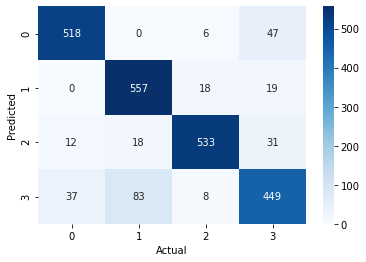

In [79]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x, train_y)
gnb_pred = gnb.predict(test_x)

gnb_con_mat = confusion_matrix(test_y, gnb_pred)
gnb_plt = sns.heatmap(gnb_con_mat, annot=True, fmt="d", cbar=True, cmap=plt.cm.Blues)
gnb_plt.set_xlabel("Actual")
gnb_plt.set_ylabel("Predicted")

print("Gaussian Naive Bayes Accuracy:", int(accuracy_score(test_y, gnb_pred) * 100), "%")